<a href="https://colab.research.google.com/github/shuvad23/Deep-learning-with-PyTorch/blob/main/PyTorch_Autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding PyTorch AutoGrad: A Complete Guide for Deep Learning Practitioners

- Deep learning practitioners often talk about gradients and backpropagation, but understanding how these calculations work under the hood can be challenging. In this comprehensive guide, we’ll dive deep into PyTorch’s AutoGrad — the powerful automatic differentiation engine that makes training neural networks possible.

**What is AutoGrad?**
- AutoGrad is a core component of PyTorch that provides automatic differentiation for tensor operations. In simpler terms, it’s a tool that automatically calculates derivatives — a critical requirement for training machine learning and deep learning models using optimization algorithms like gradient descent.
- Think of AutoGrad as your mathematical assistant that handles all the complex derivative calculations, allowing you to focus on designing and training your models rather than getting lost in calculus equations.
- Autograd is PyTorch's automatic differentiation engine that powers neural network training. It automatically calculates gradients (derivatives) for you, which are essential for optimizing neural networks using backpropagation.

**Why Do We Need AutoGrad?**
- In machine learning, we want to minimize a loss function. To do this, we need to know how changing each parameter affects the loss. Gradients tell us:

  - Direction: Which way to adjust parameters (increase/decrease)
  - Magnitude: How much to adjust them

- To understand the importance of AutoGrad, let’s start with a simple scenario and gradually build up to more complex cases.

  - **Scenario 1: Simple Derivative:**
    - Suppose we have a simple mathematical relationship: y = x**2
    - To calculate dy/dx at x=3, we can do it manually:

      - The derivative of x² is 2x.
      - Plugging in x = 3, we get 2⋅3=6
  Simple enough, right? But what happens when things get more complicated?
  - **Scenario 2: Nested Functions:**
    - Consider this slightly more complex case:
      - y = x**2
      - z = sin(y)
    - Now, we need to calculate dz/dx. Using the chain rule:

      - dz/dx = dz/dy ⋅ dy/dx
      - dz/dy = cos⁡(y)
      - dy/dx = 2x
    - Therefore, dz/dx= cos(x²) . 2x
    - The calculations are getting messier, but still manageable. However, in real neural networks, we often deal with hundreds or thousands of nested functions!

Reference Link1:https://medium.com/@piyushkashyap045/understanding-pytorch-autograd-a-complete-guide-for-deep-learning-practitioners-f5dd1f43b417

Reference Link2:https://datahacker.rs/004-computational-graph-and-autograd-with-pytorch/

Video Link:https://youtu.be/BECZ0UB5AR0?si=EQ6gzSrQHlVE0snZ



In [1]:
# example :
import torch

In [2]:
# for manual way
def dy_dx(x):
    return 2*x
dy_dx(3)


6

In [7]:
#using autograd
x = torch.tensor(3.0, requires_grad=True)
y = x**2

In [8]:
x

tensor(3., requires_grad=True)

In [9]:
y

tensor(9., grad_fn=<PowBackward0>)

In [10]:
# backward()
y.backward()

In [11]:
# grad
x.grad

tensor(6.)

In [12]:
# for another question:
import math

def dz_dx(x):
    return 2*x*math.cos(x**2)
dz_dx(4)

-7.661275842587077

In [14]:
# now using autograd
x = torch.tensor(4.0, requires_grad=True)
x

tensor(4., requires_grad=True)

In [16]:
y = x**2
z=torch.sin(y)

In [17]:
y

tensor(16., grad_fn=<PowBackward0>)

In [18]:
z

tensor(-0.2879, grad_fn=<SinBackward0>)

In [19]:
z.backward()

In [20]:
x.grad

tensor(-7.6613)

In [21]:
# y.grad
y.grad

/tmp/ipython-input-4022616512.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  y.grad


In [22]:
# for a full example , understand better-----
import torch

# Inputs
x = torch.tensor(6.7)  # Input feature
y = torch.tensor(0.0)  # True label (binary)

w = torch.tensor(1.0)  # Weight
b = torch.tensor(0.0)  # Bias

In [23]:
# Binary Cross-Entropy Loss for scalar
def binary_cross_entropy_loss(prediction,target):
    epsilon = 1e-8  # Small constant to avoid log(0)
    prediction = torch.clamp(prediction, epsilon,1-epsilon)
    loss = -(target * torch.log(prediction) + (1-target) * torch.log(1-prediction))
    return loss

In [24]:
# forward pass
z = w * x +b # weighted sum (linear part)
y_pred = torch.sigmoid(z) # predicted probability
loss = binary_cross_entropy_loss(y_pred,y) # compute binary cross-entropy loss

In [25]:
loss

tensor(6.7012)

In [27]:
# for backward propagation
# Derivatives:
# 1. dL/d(y_pred): Loss with respect to the prediction (y_pred)
dloss_dy_pred = (y_pred - y)/(y_pred*(1-y_pred))

# 2. dy_pred/dz: Prediction (y_pred) with respect to z (sigmoid derivative)
dy_pred_dz = y_pred * (1 - y_pred)

# 3. dz/dw and dz/db: z with respect to w and b
dz_dw = x  # dz/dw = x
dz_db = 1  # dz/db = 1 (bias contributes directly to z)

dL_dw = dloss_dy_pred * dy_pred_dz * dz_dw
dL_db = dloss_dy_pred * dy_pred_dz * dz_db

In [28]:
print(f"Manual Gradient of loss w.r.t weight (dw): {dL_dw}")
print(f"Manual Gradient of loss w.r.t bias (db): {dL_db}")

Manual Gradient of loss w.r.t weight (dw): 6.691762447357178
Manual Gradient of loss w.r.t bias (db): 0.998770534992218


In [31]:
# now this process are using autograd
x = torch.tensor(6.7) # input
y = torch.tensor(0.0) # output

In [30]:
w = torch.tensor(1.0, requires_grad=True) # weight
b = torch.tensor(0.0, requires_grad=True) # bias

In [32]:
z = w*x + b
z

tensor(6.7000, grad_fn=<AddBackward0>)

In [33]:
y_pred = torch.sigmoid(z)
y_pred

tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [34]:
loss = binary_cross_entropy_loss(y_pred,y)
loss

tensor(6.7012, grad_fn=<NegBackward0>)

In [35]:
# backword progation using backward() and grad
loss.backward()

In [36]:
print(w.grad)
print(b.grad)

tensor(6.6918)
tensor(0.9988)


- PyTorch autograd with vector-valued functions,

In [47]:
import torch
x = torch.tensor([1,2,3],dtype=torch.float32,requires_grad=True)
y = (x**2).mean()
y.backward()
print(x.grad)

tensor([0.6667, 1.3333, 2.0000])


### Clearing grad
.

🔁 Why You Need to Clear Gradients

- By default, PyTorch accumulates gradients into the .grad attribute of each parameter or tensor with requires_grad=True.

- That means every time you call:
  - loss.backward()
- the gradients get added (not replaced).
- So after multiple backward passes, x.grad = sum of all previous gradients, unless you manually clear them.

💡 Why PyTorch Does This

- PyTorch is designed for training neural networks, where multiple loss terms might contribute to one parameter’s gradient.
So it accumulates by default.

In [55]:
# ⚙️ Example — Accumulation Problem
import torch
x = torch.tensor([1,2,3],dtype=torch.float32,requires_grad=True)
y1 = (x**2).mean()
y1.backward() # Gradient [0.667, 1.333, 2.000] computed
print(f"After 1st backward:{x.grad}")

y2 = (x**2).mean()
y2.backward() # New gradient added to old → accumulated
print(f"After 2nd backward:{x.grad}") # x.grad doubled because same operation repeated

#new_grad = [0.6667, 1.3333, 2.0000]
# previous_grad = [0.6667, 1.3333, 2.0000]
# total_grad = [1.3334, 2.6666, 4.0000]


After 1st backward:tensor([0.6667, 1.3333, 2.0000])
After 2nd backward:tensor([1.3333, 2.6667, 4.0000])


In [57]:
# ✅ Solution — Clear Gradients Before Each Run
# To reset gradients before the next backward pass, use one of these:
# option 1 : x.grad.zero_()
x.grad.zero_() # This zeros out the gradient tensor in place.

tensor([0., 0., 0.])

In [58]:
# Option 2 — x.grad = None
x.grad = None
# This frees memory and is slightly more efficient; PyTorch will allocate a new tensor for gradients on the next backward pass.

⚙️ Correct Example with Clearing

In [60]:
# ⚙️ Correct Example with Clearing
import torch
x = torch.tensor([1,2,3],dtype=torch.float32,requires_grad=True)

# 1st pass
y1 = (x**2).mean()
y1.backward()
print(f"After 1st backward:{x.grad}")

# clear grads
x.grad.zero_() # or x.grad = None

# 2nd pass
y2 = (x**2).mean()
y2.backward()
print(f"After 2nd backward:{x.grad}")
# ✅ Now gradients are not accumulated between runs.

After 1st backward:tensor([0.6667, 1.3333, 2.0000])
After 2nd backward:tensor([0.6667, 1.3333, 2.0000])


- option 1 - requires_grad_(False)
- option 2 - detach()
- option 3 - torch.no_grad()

- PyTorch tracks all operations on tensors that have requires_grad=True
to build a computational graph for backpropagation.

- But sometimes you don’t want a tensor (or operation) to be part of that graph —
- for example, during:

  - inference (no training),

  - freezing layers,

  - copying data,

  - or preventing gradient flow.

- That’s when you use one of these three methods.

In [63]:
# ⚙️ Option 1 — requires_grad_(False)
# 🔹 What it does
# Turns off gradient tracking for a specific tensor permanently (in place).
# PyTorch will no longer compute or store gradients for that tensor.

import torch

x = torch.tensor(3.0,requires_grad=True)
print(x.requires_grad)

x.requires_grad_(False)
print(x.requires_grad)

True
False


In [74]:
# ⚙️ Option 2 — detach()
# Creates a new tensor that shares the same data as the original tensor
# but is not part of the computation graph.
# Gradients will not flow back through the detached tensor.
x = torch.tensor(3.0,requires_grad=True)
print(x.requires_grad)

y = x.detach()
print(y.requires_grad)

True
False


In [75]:
# using proper example
x = torch.tensor(3.0,requires_grad=True)
y = x**2
y

tensor(9., grad_fn=<PowBackward0>)

In [77]:
y.backward() # backward() function are still running

In [80]:
y = x.detach()
# y.backward() # this line show the error

In [70]:
# ⚙️ Option 3 — torch.no_grad()
# 🔹 What it does
# A context manager that temporarily disables all gradient tracking inside its block.
x = torch.tensor(3.0,requires_grad=True)
y = x**2
y.backward()
print(x.grad)


tensor(6.)


In [71]:
with torch.no_grad():
    y = x**2

In [73]:
# y.backward() # this show the error because of torch.no_grad() mention

###Key Concepts Explained:
1. Computational Graph
Think of it like a recipe. When you cook, each step depends on previous steps. PyTorch remembers all these steps so it can work backward to find how ingredients affected the final dish.
  
  - x → square → multiply by 3 → add 1 → z
      - (x²)   -> (3x²)       ->(3x² + 1)

2. Chain Rule
Autograd uses the chain rule from calculus automatically. If z = f(y) and y = g(x), then:
  - dz/dx = (dz/dy) × (dy/dx)

3. Why Zero Gradients?
Gradients accumulate by default. This is useful for some advanced techniques, but usually you want fresh gradients each iteration, so you must zero them.
- Common Pitfalls & Tips:
  - ❌ Forgetting to zero gradients
  - Wrong - gradients accumulate!
    - for epoch in range(10):
        - loss.backward()
    (optimizer.step() but no zero_grad()!)
  - ✅ Always zero gradients:
    - for epoch in range(10):
      - optimizer.zero_grad()  (or loss.backward() then optimizer.zero_grad())
      - loss.backward()
      - optimizer.step()
  - ❌ Calling backward() on non-scalar:
    - y = x ** 2  (vector)
    - y.backward()  ( Error! Need scalar)
  - ✅ Use .sum() or specify gradient:
    - y = x ** 2
    - y.sum().backward()  (Works!)

**When to Use torch.no_grad():**
- Use it when you don't need gradients (saves memory and speeds up computation):

  - Evaluation/Testing: When making predictions
  - Manual parameter updates: When updating weights manually
  - Preprocessing: When preparing data

**Summary: **
Autograd is magical because:

- You just write forward pass code
- PyTorch automatically figures out how to compute gradients
- No manual derivative calculations needed!
- Essential for training any neural network

The three-step training pattern:

- Forward pass → compute loss
- Backward pass → .backward() computes gradients
- Update → adjust parameters using gradients



## Understanding PyTorch’s Dynamic Computational Graphs:
reference link: https://medium.com/@serverwalainfra/understanding-pytorchs-dynamic-computational-graphs-bf77ee51e5c8

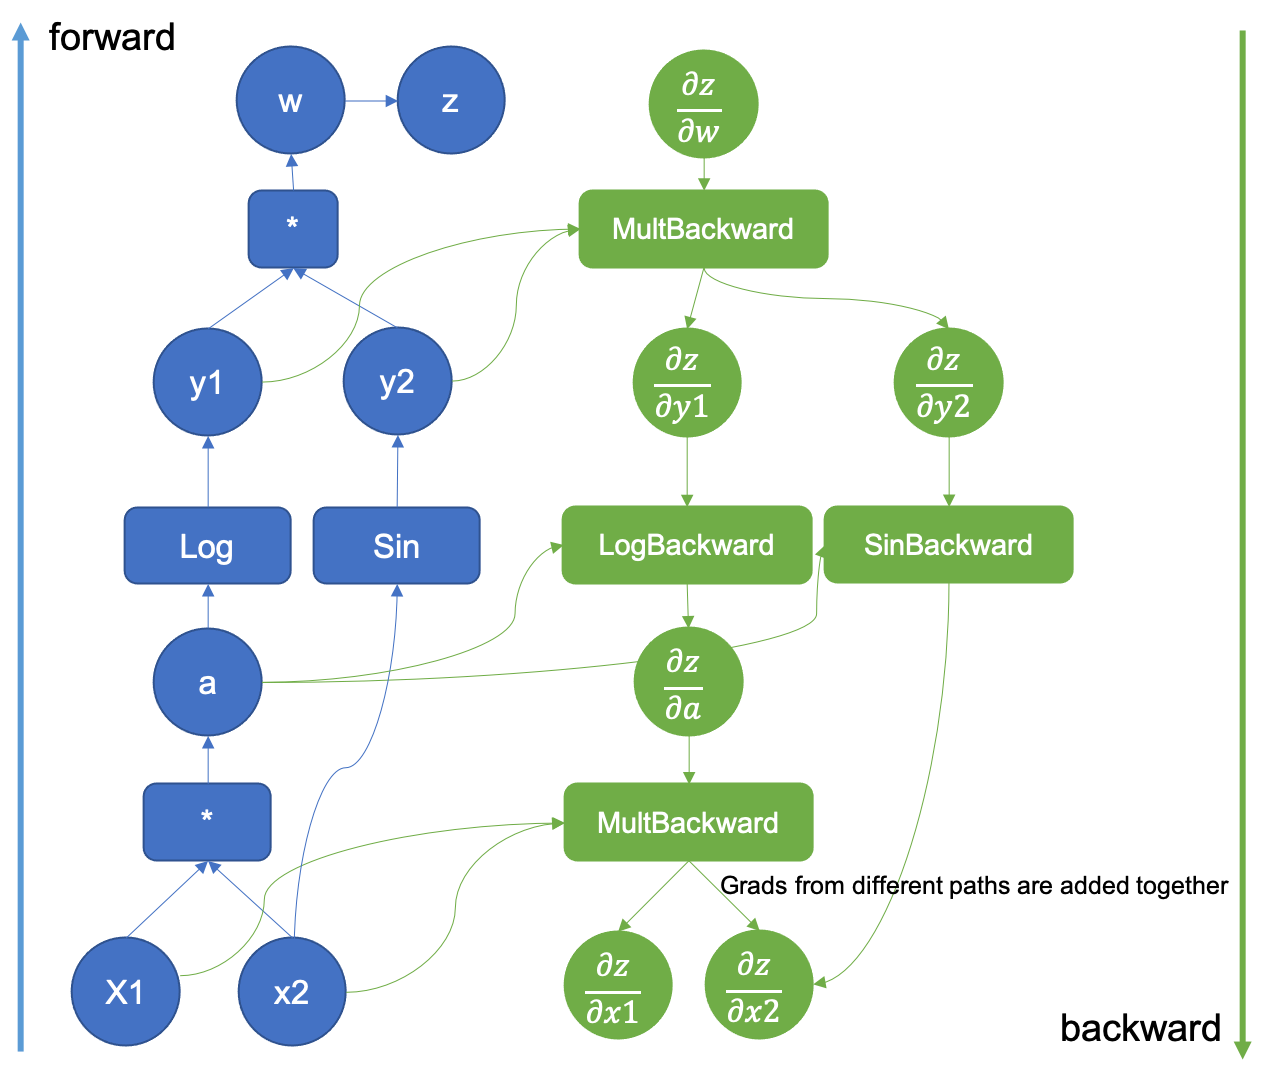

### PyTorch – Computational graph and Autograd with Pytorch:

  - 1. Computation graph – introduction
    - Let’s first explain why do we need a computation graph? To answer this question, we have to check how the computation for the linear model is organized.

    - In our previous post we designed s very simple linear model which takes an input x and predicts the output y^.


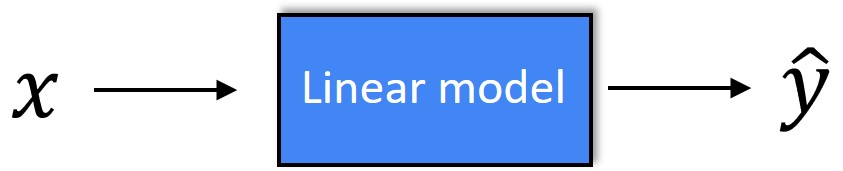


- First, we will apply a forward propagation step in order to calculate the loss of a single point from our data set. Remember that loss L is the squared error of a single point, and a cost is the average of all losses. So, we will calculate the loss of a single point (x,y) where x=1 and y=2. In order to do that, we also need to guess initial values for parameters w and b. So, lets say that w=5, and b=1. Now, we can easily compute a loss as it is shown in the following computation graph.


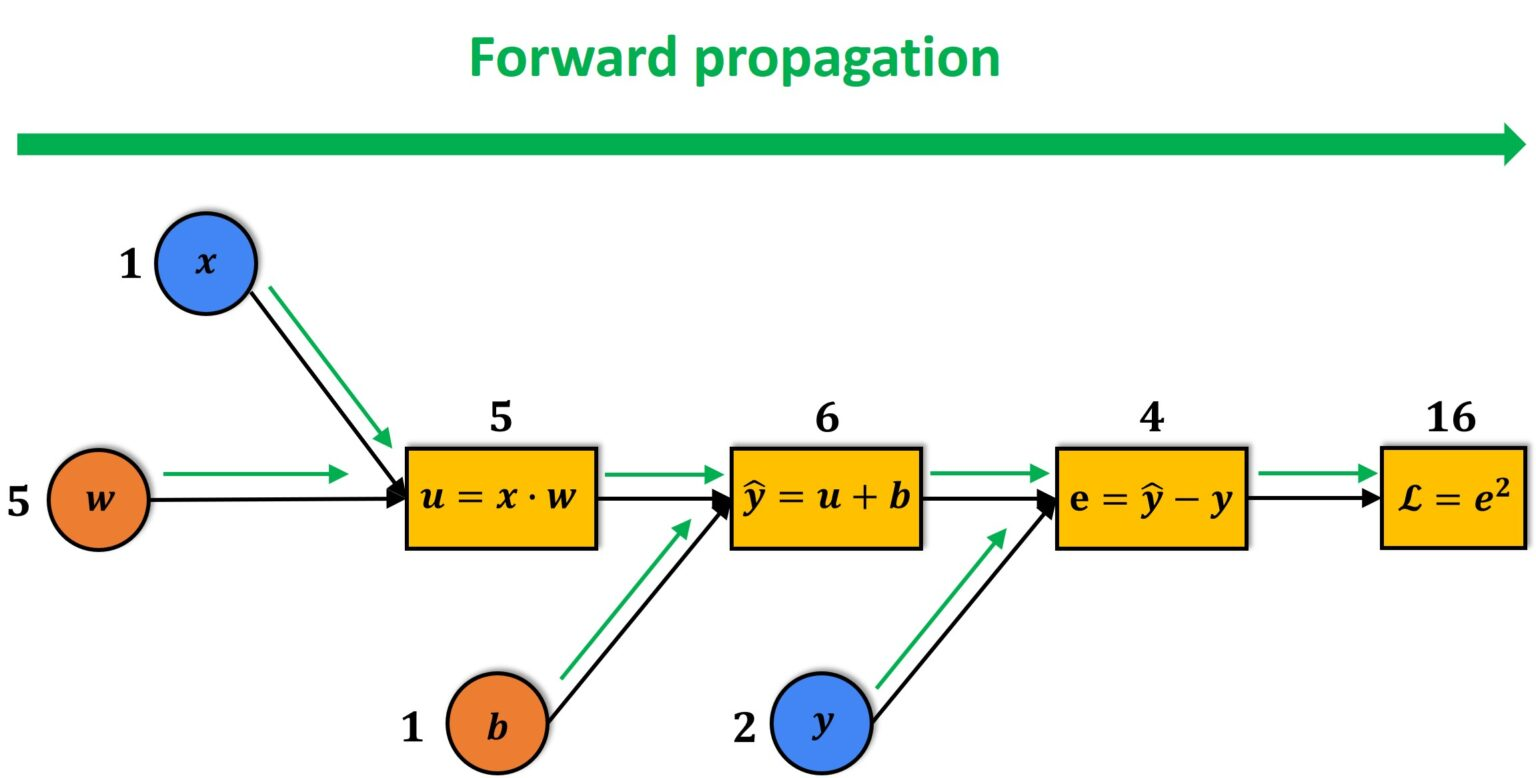


- Now, after running this forward pass in the direction of green arrows, where we have calculated the value of L, we are going to run a backward pass in the opposite direction. So, we will start from the output L, and then we will backpropagate gradients from the output node to each individual node. In this way, at each individual node, we will be able to read off the gradients with respect to L and the variable in that particular node. In the following illustration, you can see how the backpropagation step looks like. Here, we are using two different colors to separate two different types of quantities. For backpropagated gradients, we are using red color for local gradients we are using a blue color.


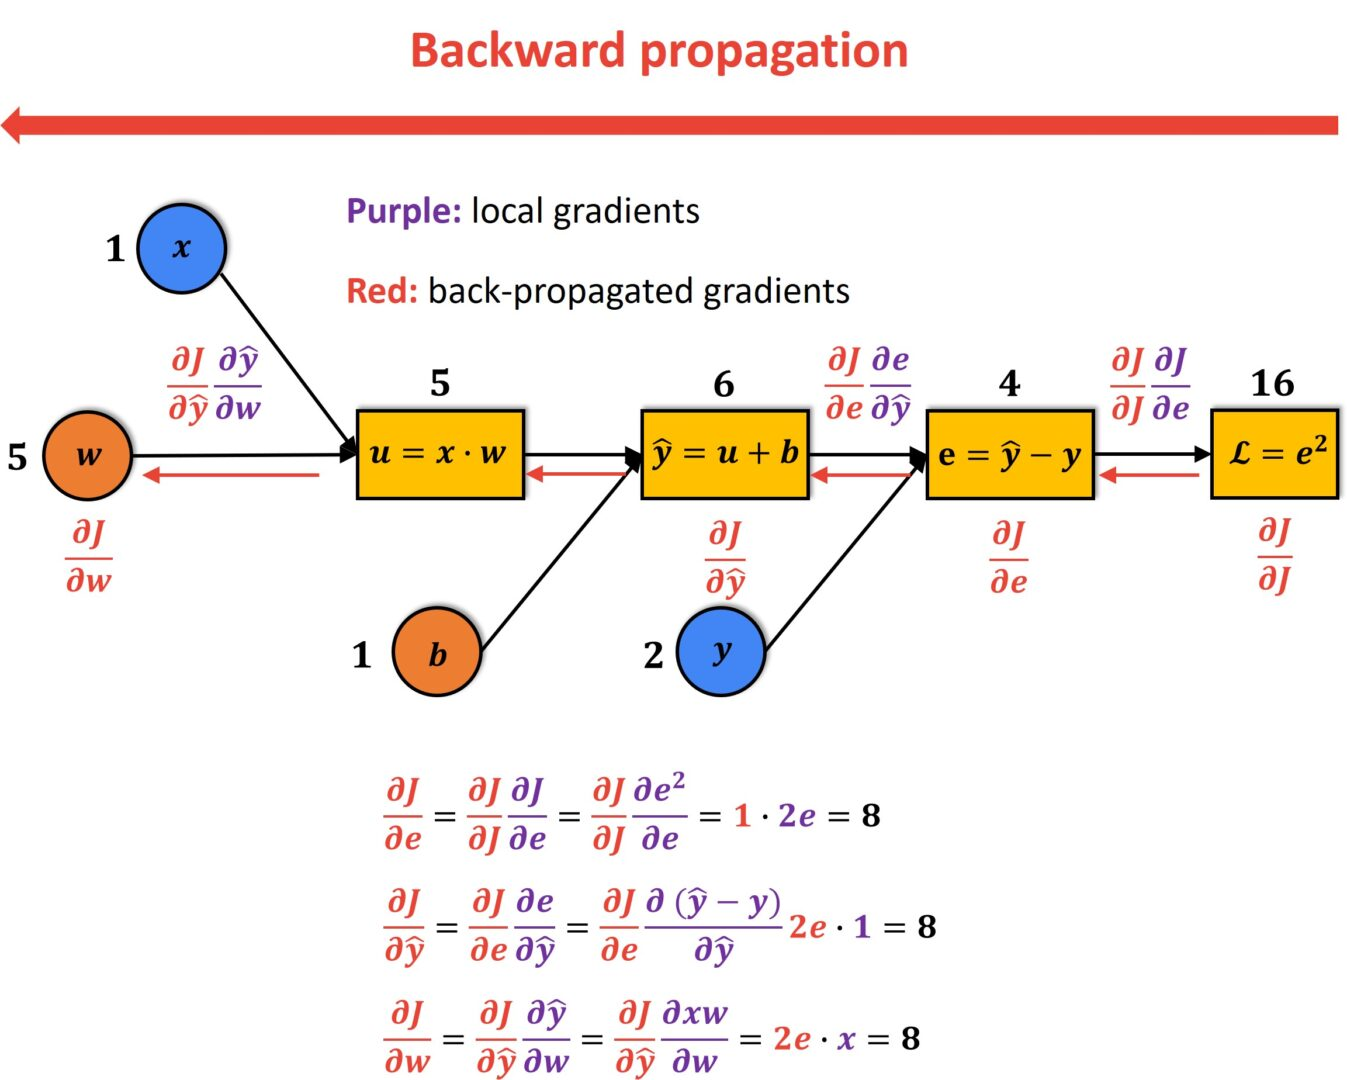

reference link(for more understand): https://rushiblogs.weebly.com/aimachinelearning/category/neural-networks

- y=3x2+4x+2

  - Here, x is an independent variable, while y is a dependent variable. In the following image we can see the computational graph of this equation.

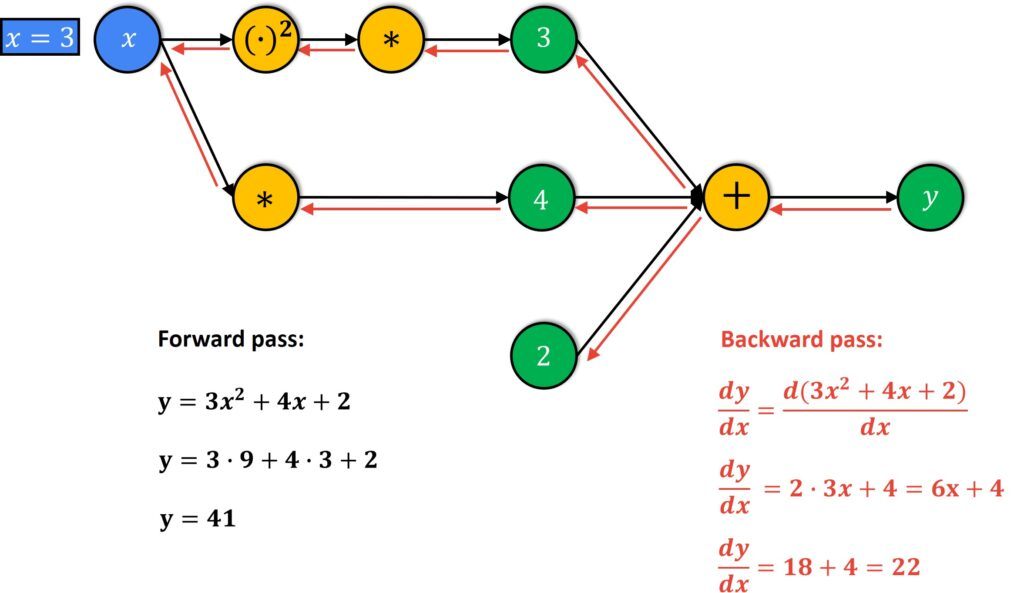